# 空氣污染分析

In [20]:
import pandas as pd
import numpy as np
import matplotlib as plt

## 1. 匯入資料

In [2]:
AQXDaily=pd.read_csv("AQXDaily_20170409211519.csv")
AQXDaily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
SiteId          1000 non-null int64
SiteName        1000 non-null object
MonitorDate     1000 non-null object
PSI             1000 non-null int64
SO2SubIndex     991 non-null float64
COSubIndex      920 non-null float64
O3SubIndex      852 non-null float64
PM10SubIndex    988 non-null float64
NO2SubIndex     0 non-null float64
dtypes: float64(5), int64(2), object(2)
memory usage: 70.4+ KB


In [7]:
AQXDaily.head()

,SiteId,SiteName,MonitorDate,PSI,SO2SubIndex,COSubIndex,O3SubIndex,PM10SubIndex,NO2SubIndex
0,83,麥寮,2017-04-08,52,4.0,NaN,NaN,52.0,NaN
1,80,關山,2017-04-08,25,2.0,NaN,25.0,23.0,NaN
2,78,馬公,2017-04-08,27,1.0,2.0,24.0,27.0,NaN
3,77,金門,2017-04-08,24,3.0,2.0,24.0,23.0,NaN
4,75,馬祖,2017-04-08,39,5.0,5.0,37.0,39.0,NaN


In [4]:
AQXDaily.describe()

,SiteId,PSI,SO2SubIndex,COSubIndex,O3SubIndex,PM10SubIndex,NO2SubIndex
count,1000.000000,1000.000000,991.000000,920.000000,852.000000,988.000000,0.0
mean,39.434000,63.540000,5.353179,6.884783,61.374413,55.302632,NaN
std,22.885615,12.326977,2.659534,3.886556,14.259619,11.778370,NaN
min,1.000000,24.000000,1.000000,1.000000,18.000000,17.000000,NaN
25%,20.000000,56.000000,4.000000,5.000000,52.000000,49.750000,NaN
50%,39.000000,63.000000,5.000000,6.000000,62.000000,56.000000,NaN
75%,59.000000,72.000000,7.000000,8.000000,71.000000,62.000000,NaN
max,83.000000,112.000000,28.000000,29.000000,112.000000,88.000000,NaN


## 2. find relation

In [3]:
AQXDaily=AQXDaily.dropna(axis=1,how="all").dropna(axis=0,how="any")

### (1)

c:\users\alixh\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000276432E3748>,
      dtype=object)

c:\users\alixh\appdata\local\programs\python\python36\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['Microsoft JhengHei'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


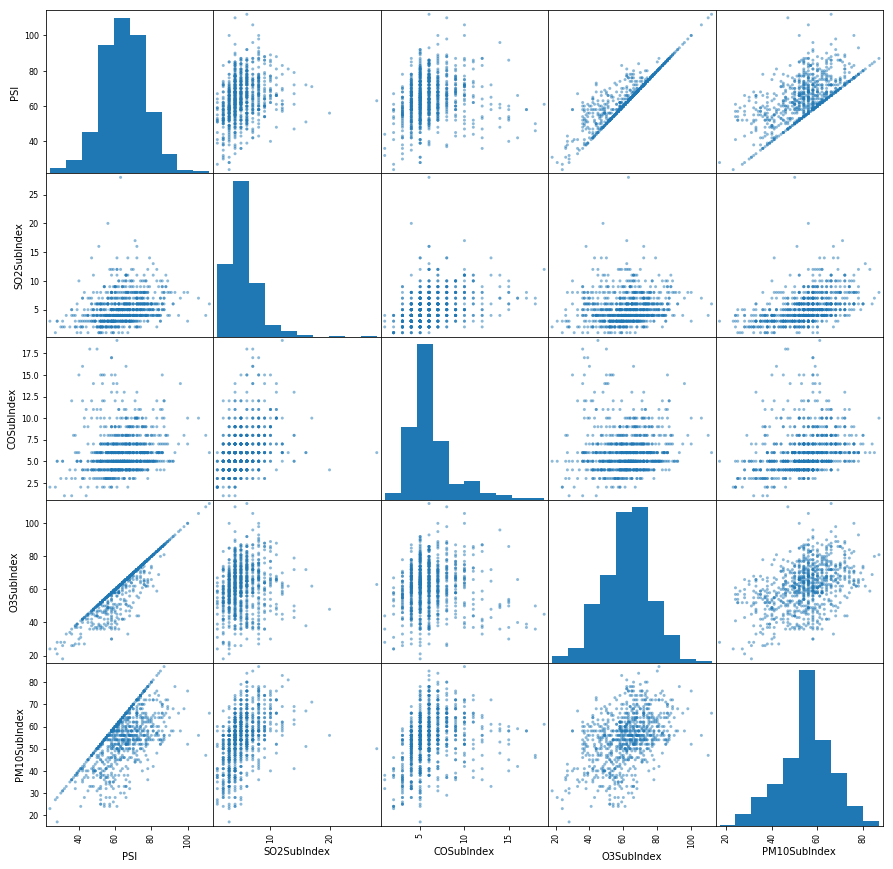

In [33]:
from pandas.tools import plotting
plotting.scatter_matrix(AQXDaily[['PSI', 'SO2SubIndex', 'COSubIndex','O3SubIndex','PM10SubIndex']],figsize=(15,15))

由上圖可以知道
1. PSI和O3SubIndex、PM10SubIndex 成正相關
2. PSI、O3SubIndex、PM10SubIndex 近似於常態分佈，而其他的是偏左的分布

### (2) t-test

In [15]:
from scipy import stats
print(stats.ttest_ind(AQXDaily['PSI'],AQXDaily['SO2SubIndex']))
print(stats.ttest_ind(AQXDaily['PSI'],AQXDaily['COSubIndex']))
print(stats.ttest_ind(AQXDaily['PSI'],AQXDaily['O3SubIndex']))
print(stats.ttest_ind(AQXDaily['PSI'],AQXDaily['PM10SubIndex']))
print(stats.ttest_ind(AQXDaily['SO2SubIndex'],AQXDaily['COSubIndex']))
print(stats.ttest_ind(AQXDaily['SO2SubIndex'],AQXDaily['O3SubIndex']))
print(stats.ttest_ind(AQXDaily['SO2SubIndex'],AQXDaily['PM10SubIndex']))
print(stats.ttest_ind(AQXDaily['COSubIndex'],AQXDaily['O3SubIndex']))
print(stats.ttest_ind(AQXDaily['COSubIndex'],AQXDaily['PM10SubIndex']))
print(stats.ttest_ind(AQXDaily['O3SubIndex'],AQXDaily['PM10SubIndex']))

Ttest_indResult(statistic=135.9914877097602, pvalue=0.0)
Ttest_indResult(statistic=134.30055691523003, pvalue=0.0)
Ttest_indResult(statistic=4.100393732126366, pvalue=4.32665618666407e-05)
Ttest_indResult(statistic=16.8996242183802, pvalue=3.4751795904884713e-59)
Ttest_indResult(statistic=-6.765108065309515, pvalue=1.8482842840194755e-11)
Ttest_indResult(statistic=-113.8732425623369, pvalue=0.0)
Ttest_indResult(statistic=-119.61007937929978, pvalue=0.0)
Ttest_indResult(statistic=-112.3210802387165, pvalue=0.0)
Ttest_indResult(statistic=-117.80144873275759, pvalue=0.0)
Ttest_indResult(statistic=11.445861404242503, pvalue=3.0839897063809674e-29)


t-test  主要是檢驗兩組之間是否有均值的差異，所以條件是有兩組也只能有兩組

T值與差異顯著性關係表

           t	           P值	   差異顯著程度

        t>=t(df)0.01	P<=0.01  	差異非常顯著

        t>=t(df)0.05	P<=0.05	    差異顯著

        t<t(df)0.05	     P>0.05	    差異不顯著

### (3) Linear Regression

c:\users\alixh\appdata\local\programs\python\python36\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['Microsoft JhengHei'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


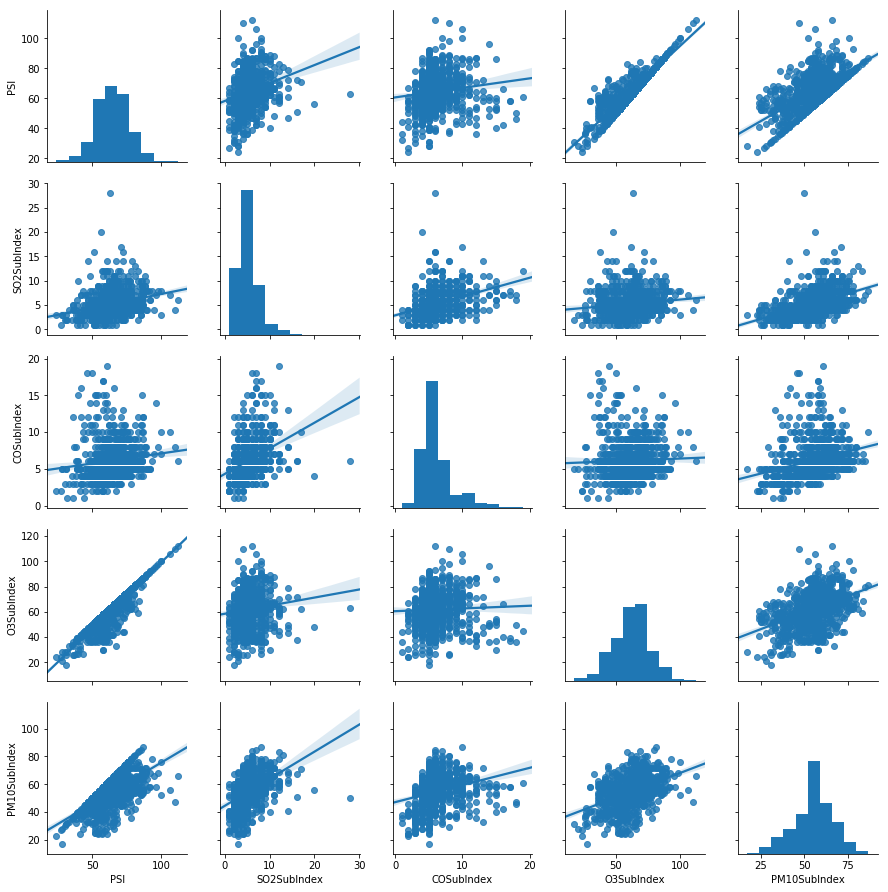

In [33]:
import seaborn as sns
sns.pairplot(AQXDaily, vars=['PSI', 'SO2SubIndex', 'COSubIndex','O3SubIndex','PM10SubIndex'],kind='reg')  

* PSI  v.s. O3SubIndex

In [19]:
np.polyfit(AQXDaily['PSI'],AQXDaily['O3SubIndex'],deg=1)

array([ 1.05293927, -6.07415947])

c:\users\alixh\appdata\local\programs\python\python36\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['Microsoft JhengHei'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


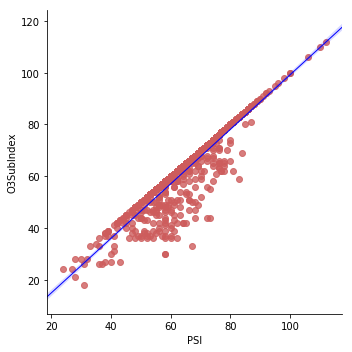

In [24]:
import seaborn as sns

sns.lmplot('PSI', 'O3SubIndex', AQXDaily,
           scatter_kws={"marker": "o", "color": "indianred"},
           line_kws={"linewidth": 1, "color": "blue"});

* PSI  v.s.  PM10SubIndex

In [25]:
np.polyfit(AQXDaily['PSI'],AQXDaily['PM10SubIndex'],deg=1)

array([ 0.59054509, 16.52731824])

c:\users\alixh\appdata\local\programs\python\python36\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['Microsoft JhengHei'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


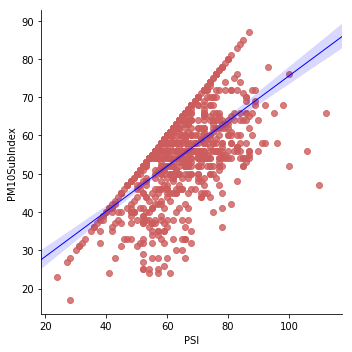

In [27]:
sns.lmplot('PSI', 'PM10SubIndex', AQXDaily,
           scatter_kws={"marker": "o", "color": "indianred"},
           line_kws={"linewidth": 1, "color": "blue"});

### (3) Anova

In [38]:
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.tools import FigureFactory as FF

import numpy as np
import pandas as pd
import scipy

import statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols

ModuleNotFoundError: No module named 'statsmodels'

pip install statsmodels   但是一直出現錯誤

## 3.

In [49]:
import geopy
from geopy.geocoders import Nominatim
loc=list(set(AQXDaily["SiteName"]))
dic={}
for place in loc:
    temp=[]
    geolocator = Nominatim()
    location = geolocator.geocode("台灣"+place)
    temp.append(location.latitude)
    temp.append(location.longitude)
    dic[place]=temp

In [60]:
dic

{'陽明': [23.9739374, 120.9820179],
 '竹山': [23.5112534, 120.8232887],
 '前金': [22.651844, 120.46704],
 '臺南': [22.9912348, 120.184982],
 '西屯': [24.18138, 120.63666],
 '屏東': [22.6697227, 120.4884652],
 '基隆': [25.1317232, 121.744652],
 '新店': [24.9673093, 121.5415784],
 '松山': [25.0498852, 121.5772719],
 '潮州': [22.5499793, 120.5360618],
 '斗六': [23.7050525, 120.5372523],
 '橋頭': [22.7610541, 120.3103108],
 '林口': [23.136277, 120.488265],
 '新竹': [24.8066333, 120.9686833],
 '三義': [24.4205696, 120.7740797],
 '平鎮': [23.434444, 120.296667],
 '馬公': [23.5662167, 119.5785833],
 '大里': [22.95520985, 120.209072583106],
 '苗栗': [24.5614833, 120.8192333],
 '中山': [25.0526256, 121.5203914],
 '淡水': [25.1677828, 121.4455744],
 '金門': [22.9845659, 120.2054288],
 '美濃': [22.8363731, 121.0928033],
 '新港': [24.172222, 120.489722],
 '花蓮': [23.982074, 121.60681],
 '龍潭': [23.868152, 120.57975],
 '新莊': [25.0359472, 121.4504128],
 '豐原': [22.7282309, 121.1063135],
 '大園': [23.585278, 120.548056],
 '善化': [23.1330374, 120.3066223

In [51]:
AQXDaily["SiteName"]=AQXDaily["SiteName"].map(dic)

In [59]:
AQXDaily

,SiteId,SiteName,MonitorDate,PSI,SO2SubIndex,COSubIndex,O3SubIndex,PM10SubIndex
2,78,"[23.5662167, 119.5785833]",2017-04-08,27,1.0,2.0,24.0,27.0
3,77,"[22.9845659, 120.2054288]",2017-04-08,24,3.0,2.0,24.0,23.0
4,75,"[24.9868596, 121.5457025]",2017-04-08,39,5.0,5.0,37.0,39.0
5,72,"[23.9666667, 120.9691462]",2017-04-08,61,2.0,3.0,61.0,45.0
8,69,"[23.5112534, 120.8232887]",2017-04-08,62,4.0,3.0,62.0,52.0
11,66,"[25.01715, 121.8164899]",2017-04-08,50,4.0,6.0,37.0,50.0
12,65,"[24.7519538, 121.7533344]",2017-04-08,44,2.0,4.0,42.0,44.0
13,64,"[23.9739374, 120.9820179]",2017-04-08,68,5.0,4.0,68.0,32.0
14,63,"[23.982074, 121.60681]",2017-04-08,30,2.0,3.0,28.0,30.0
15,62,"[22.7560447, 121.1456538]",2017-04-08,31,2.0,5.0,18.0,31.0


In [54]:
import numpy as np
from folium.plugins import HeatMapWithTime
import folium
center_pos = [23.5, 121]

# 使用 numpy 建立初始資料
initial_data = (np.random.normal(size=(200, 2)) *
                np.array([[0.02, 0.02]]) +
                np.array([center_pos]))

# 建立連續資料
data = [initial_data.tolist()]
for i in range(20):
    data.append((data[i] + np.random.normal(size=(200, 2)) * 0.001).tolist())

fmap = folium.Map(center_pos, zoom_start=11)
fmap.add_child(HeatMapWithTime(data)) # 顯示連續熱度圖

[[[23.51865065483105, 120.99139832630338],
  [23.47742589347874, 120.98973371146032],
  [23.520432227716093, 120.97851362004712],
  [23.482622761500295, 121.05351588467398],
  [23.495268380146662, 120.99244683057488],
  [23.43828395755709, 120.98931260451943],
  [23.507478735445723, 120.97954815155278],
  [23.50128155057143, 120.98883670860937],
  [23.483863927964155, 121.02016203105829],
  [23.495444891760947, 121.0079396054128],
  [23.509953336235967, 121.02527551837571],
  [23.497282101171038, 121.00391742865678],
  [23.452549108120667, 121.01893754546848],
  [23.503020620260937, 120.99449163636939],
  [23.505761469338466, 121.02184331315988],
  [23.498471714133395, 120.98456876610024],
  [23.45809028593153, 121.0303463398269],
  [23.497549060052755, 121.00750819402634],
  [23.51790824316012, 121.02977359527078],
  [23.469673791799096, 120.98009922101454],
  [23.47801656933385, 121.0366335064928],
  [23.504216210088543, 121.00952081949623],
  [23.535184385460674, 120.98015081540893]